In [267]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font",size=14)
from sklearn.model_selection import train_test_split#splitting data arr into two subsets
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [269]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [263]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [264]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
path = "C:\\Users\\HC\\StrokePrediction\\StrokePrediction\\StrokePrediction.csv"
stroke = pd.read_csv(path)


In [7]:
stroke

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

In [8]:
stroke.shape

(5110, 11)

In [9]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
#checking the null values
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
stroke[stroke==0].count()

gender                  0
age                     0
hypertension         4612
heart_disease        4834
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4861
dtype: int64

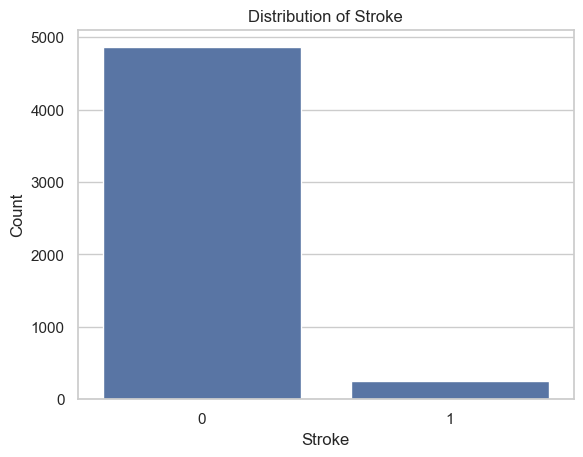

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'stroke'
sns.countplot(x='stroke', data=stroke)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke')
plt.show()

In [13]:
#filling null values with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace= True)

In [14]:
#filling null values with mode
stroke['smoking_status'].fillna(stroke['smoking_status'].mode()[0], inplace=True)

In [15]:
#checking the data
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
stroke.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000

In [17]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


C:\Users\HC\AppData\Local\Temp\ipykernel_11340\4219846767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['avg_glucose_level'], bins=20)


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

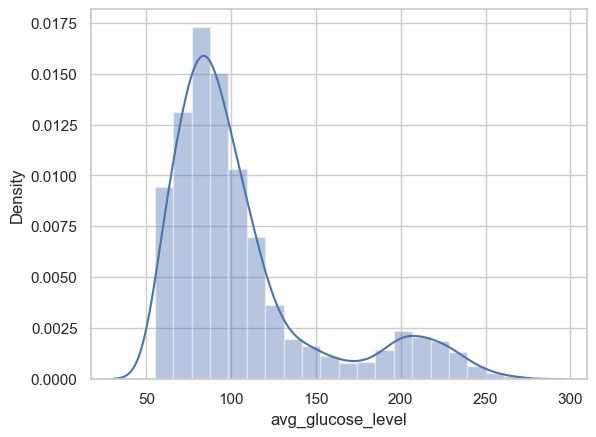

In [18]:
sns.distplot(stroke['avg_glucose_level'], bins=20)

C:\Users\HC\AppData\Local\Temp\ipykernel_11340\1423296739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['bmi'], bins=20)


<Axes: xlabel='bmi', ylabel='Density'>

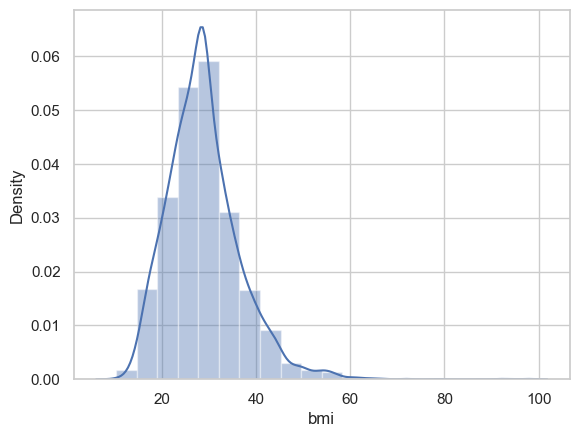

In [19]:
sns.distplot(stroke['bmi'], bins=20)

C:\Users\HC\AppData\Local\Temp\ipykernel_11340\765895098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['age'], bins=20)


<Axes: xlabel='age', ylabel='Density'>

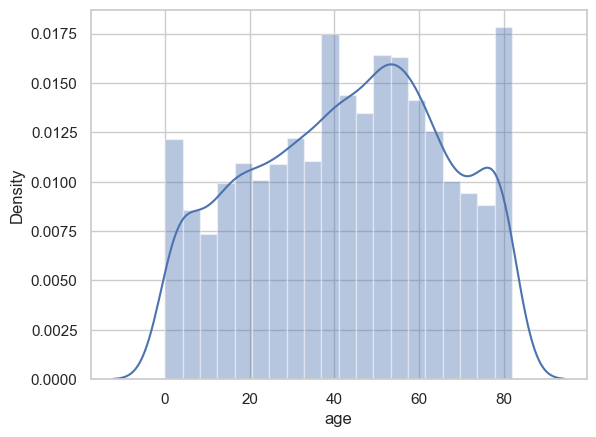

In [20]:
sns.distplot(stroke['age'], bins=20)

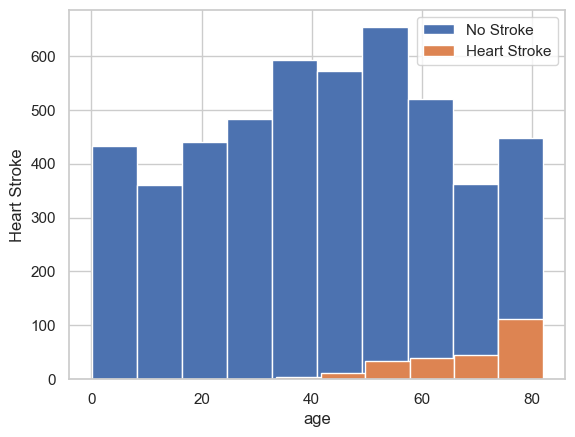

In [21]:
#does age has impact on strokes  SO ans->yes
#chances of stroke increases with increases in age
stroke.loc[stroke['stroke'] == 0,'age'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'age'].hist(label='Heart Stroke')
plt.xlabel('age')
plt.ylabel('Heart Stroke')
plt.legend()

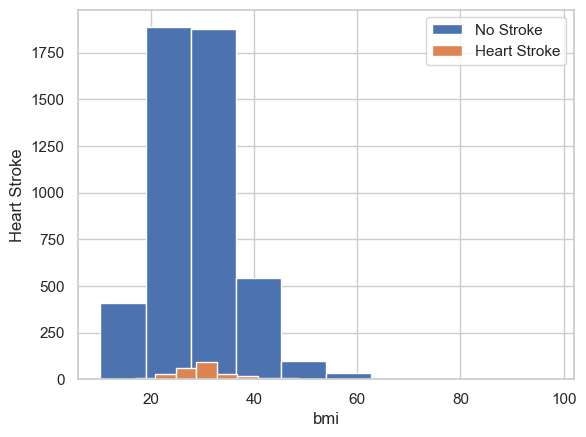

In [22]:
#chances of stroke more with bmi 20-40
stroke.loc[stroke['stroke'] == 0,'bmi'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'bmi'].hist(label='Heart Stroke')
plt.xlabel('bmi')
plt.ylabel('Heart Stroke')
plt.legend()

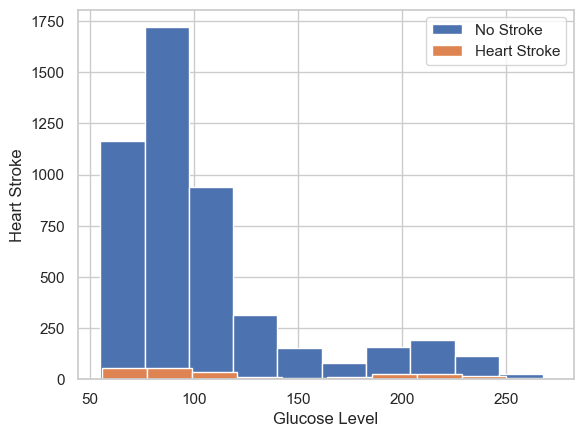

In [23]:
#chances of stroke high with glucose levels in range of 70-100
stroke.loc[stroke['stroke'] == 0,'avg_glucose_level'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Heart Stroke')
plt.legend()

In [25]:
#married females have more chances of heart stroke than married males
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='ever_married', aggfunc= 'count')

gender  Female    Male  Other
stroke                       
0       2853.0  2007.0    1.0
1        141.0   108.0    NaN

In [26]:
#females with hypertension has more chance of heart stroke than males having hypertension problem
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='hypertension', aggfunc= 'count')

gender  Female    Male  Other
stroke                       
0       2853.0  2007.0    1.0
1        141.0   108.0    NaN

In [27]:
#females with heart disease has more chances of stroke
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='heart_disease', aggfunc= 'count')

gender  Female    Male  Other
stroke                       
0       2853.0  2007.0    1.0
1        141.0   108.0    NaN

In [28]:
#people having private jobs and has a habit of smoking has more chance of heart stroke
pd.pivot_table(stroke, index= 'stroke', columns='work_type', values='smoking_status', aggfunc= 'count')

work_type  Govt_job  Never_worked  Private  Self-employed  children
stroke                                                             
0             624.0          22.0   2776.0          754.0     685.0
1              33.0           NaN    149.0           65.0       2.0

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

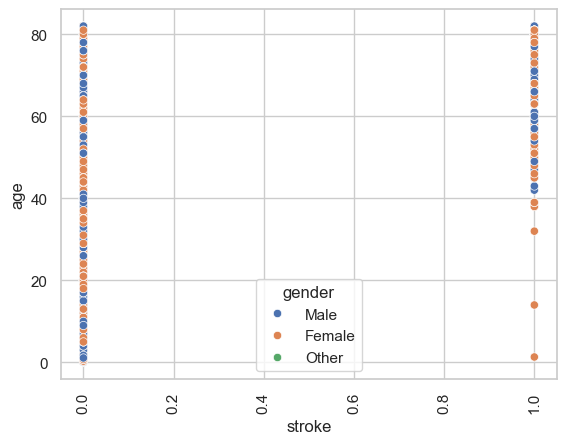

In [29]:
#as age incraeses gender does not play any role in heart stroke
sns.scatterplot(x= 'stroke', y='age', hue='gender', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

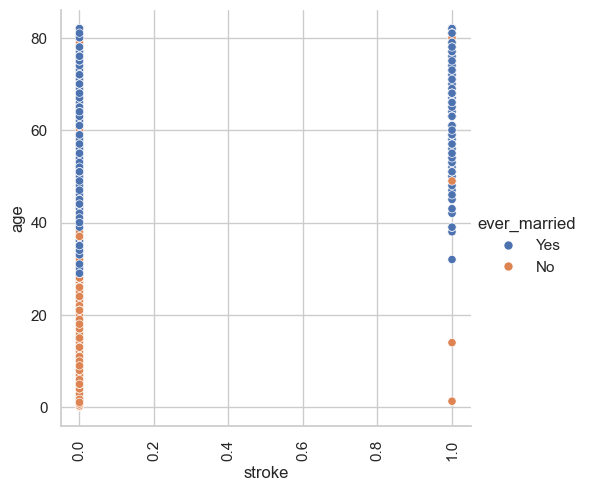

In [30]:
#can't say that marriage plays a role in heart stroke as people generally marry after the age of 25years
sns.relplot(x= 'stroke', y='age', hue= 'ever_married', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

<Figure size 2800x2000 with 0 Axes>

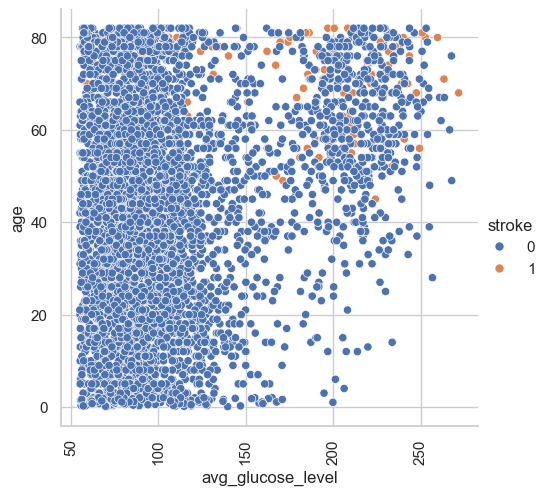

In [31]:
#with age glucose level increases which increases the chances of stroke
plt.figure(figsize=(28,20))
sns.relplot(x= 'avg_glucose_level', y='age', hue= 'stroke', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

In [32]:
stroke['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [113]:
#ENCODING THE DATASETS
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()
for i in stroke.columns:
    if isinstance(stroke[i][0], str):
            stroke[i] = encoder.fit_transform(stroke[i])

In [114]:
#STANDARDIZING
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 
scalar.fit(stroke) 
scaled_data = scalar.transform(stroke)

In [115]:
#creating a model
X= stroke.drop('stroke', axis=1)
X.shape

(5110, 10)

In [116]:
y= stroke['stroke']
y.shape

(5110,)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,y,test_size=0.2,random_state=101)

In [119]:
X_train

gender   age  hypertension  heart_disease  ever_married  work_type  \
3831       0  55.0             0              0             0          3   
5085       0  72.0             0              0             1          2   
1593       1  31.0             0              0             1          2   
1324       0  80.0             0              0             1          0   
123        1  56.0             1              0             1          2   
...      ...   ...           ...            ...           ...        ...   
4171       1  45.0             0              0             1          2   
599        0  59.0             1              0             1          2   
1361       0  59.0             0              0             1          2   
1547       1  59.0             0              1             1          3   
4959       0  50.0             0              0             1          3   

      Residence_type  avg_glucose_level        bmi  smoking_status  
3831               0              67.10  31.400000               2  
5085               1              83.89  33.100000               1  
1593               1              71.31  25.800000               2  
1324               1              84.86  28.893237               0  
123                0             249.31  35.800000               2  
...              ...                ...        ...             ...  
4171               1             115.52  33.900000               1  
599                1             204.86  30.800000               2  
1361               1              89.96  28.100000               0  
1547               0             194.98  30.400000               0  
4959               1              62.63  23.400000               2  

[4088 rows x 10 columns]

In [120]:
X_test

gender   age  hypertension  heart_disease  ever_married  work_type  \
5031       0  20.0             0              0             0          2   
4017       0  44.0             0              0             1          2   
744        0  71.0             1              0             1          2   
1799       1  34.0             0              0             1          2   
2314       1  82.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
4795       1  62.0             0              0             1          3   
4641       0  45.0             0              0             1          0   
1320       0  58.0             0              1             1          2   
1098       0  77.0             0              0             1          2   
4634       1  77.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
5031               0             117.59  17.1               2  
4017               0             110.41  30.5               3  
744                1             194.62  31.6               2  
1799               1             108.12  22.2               0  
2314               1              89.83  24.7               3  
...              ...                ...   ...             ...  
4795               0             136.18  32.2               0  
4641               0              84.99  35.4               0  
1320               0             144.16  26.0               3  
1098               0              75.06  22.0               0  
4634               1              94.68  33.6               0  

[1022 rows x 10 columns]

In [121]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [122]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [123]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [124]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [125]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [126]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()

In [127]:
Knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [137]:
Knn.score(X_train_std,Y_train)

0.9535225048923679

In [138]:
stroke_copy= stroke.copy()

In [139]:
stroke_copy.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

In [140]:
#creating a list of data values which is more in number to make a balance data
li = list(stroke_copy[stroke_copy.stroke == 0].sample(n=2000).index)
stroke_copy['stroke'].value_counts() 

stroke
0    4861
1     249
Name: count, dtype: int64

In [141]:
stroke = pd.DataFrame(stroke)
stroke.reset_index()

index  gender   age  hypertension  heart_disease  ever_married  \
0         0       1  67.0             0              1             1   
1         1       0  61.0             0              0             1   
2         2       1  80.0             0              1             1   
3         3       0  49.0             0              0             1   
4         4       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105   5105       0  80.0             1              0             1   
5106   5106       0  81.0             0              0             1   
5107   5107       0  35.0             0              0             1   
5108   5108       1  51.0             0              0             1   
5109   5109       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             2               1             228.69  36.600000               1   
1             3               0             202.21  28.893237               2   
2             2               0             105.92  32.500000               2   
3             2               1             171.23  34.400000               3   
4             3               0             174.12  24.000000               2   
...         ...             ...                ...        ...             ...   
5105          2               1              83.75  28.893237               2   
5106          3               1             125.20  40.000000               2   
5107          3               0              82.99  30.600000               2   
5108          2               0             166.29  25.600000               1   
5109          0               1              85.28  26.200000               0   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [142]:
X = stroke.drop(['stroke'], axis=1).values 
y = stroke['stroke'].values
X.shape

(5110, 10)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1000)

In [144]:
Knn.fit(X_train , y_train)

KNeighborsClassifier()

In [145]:
Knn.score( X_test, y_test)

0.9445531637312459

In [147]:
y_underKnn = Knn.predict(X)

In [149]:
print('The accuracy score of the model is:', accuracy_score(y,y_underKnn)*100)
print('The F1 score of the model is:', f1_score(y, y_underKnn)*100)
print('The recall score of the model is:', recall_score(y, y_underKnn)*100)
print('The confusion matrix of the model is:', confusion_matrix(y, y_underKnn))
print('The classification report of logistic model is:', classification_report(y, y_underKnn))

The accuracy score of the model is: 95.0880626223092
The F1 score of the model is: 8.727272727272728
The recall score of the model is: 4.819277108433735
The confusion matrix of the model is: [[4847   14]
 [ 237   12]]
The classification report of logistic model is:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4861
           1       0.46      0.05      0.09       249

    accuracy                           0.95      5110
   macro avg       0.71      0.52      0.53      5110
weighted avg       0.93      0.95      0.93      5110



In [150]:
cm_Knn= confusion_matrix(y, y_underKnn)

<Axes: title={'center': 'K Nearest Neighbour Confusion Matrix'}>

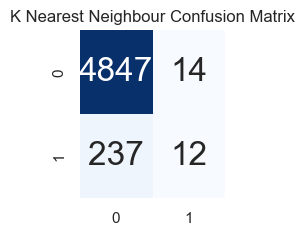

In [152]:
plt.subplot(2,3,1)
plt.title("K Nearest Neighbour Confusion Matrix")
sns.heatmap(cm_Knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [155]:
import pickle
pickle.dump(Knn, open("strokenew.pkl", "wb"))

In [157]:
for i in y_underKnn:
    print (i)

0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
